In [1]:
from patch_analysis import * 

For a unique file 

In [2]:
%% cache
file = input_file()
X, Y, infos_mb = read_abf_file(file, list_sweeps=sweeps_mb)
infos_mb = membrane_properties(X, Y, infos_mb, show_ref_resist=True)
X, Y, infos = read_abf_file(file, list_sweeps=None)
if infos_mb['mode'] == 'vc' :
    infos= ramp_results(X, Y, infos, plot_curve = True, plot_g_ref = True)
elif infos_mb['mode'] == 'cc' : 
    infos = current_freq(X,Y, infos, plot_freq = True)

UsageError: Cell magic `%%` not found.


In [3]:
%% cache 

folder = r'W:\DATA\Patch\raw'
conditions = {'ramp_terb' : ['baseline', 'terb'], 'ramp_terb_100' : ['baseline', 'terb', 'inhib'], 'step' : ['baseline', 'terb']}
data_info = {}
for exp in ['ramp_terb', 'ramp_terb_100', 'step'] : 
    data_info[exp] = {}
    for condition in conditions[exp] : 
        data_info[exp][condition] = choose_files_from_folder(folder = folder, title = f'{exp}_{condition}')

save_dict(data_info, r'W:\Analysis\patch\infos.pkl')

UsageError: Cell magic `%%` not found.


In [4]:
%% cache 
data_info = read_dict(r'W:\Analysis\patch\infos.pkl')
conditions = {'ramp_terb' : ['baseline', 'terb'], 'ramp_terb_100' : ['baseline', 'terb', 'inhib'], 'step' : ['baseline', 'terb']}
results = {}
for exp in ['ramp_terb', 'ramp_terb_100', 'step'] : 
    results[exp] = {}
    for condition in conditions[exp] : 
        print(exp, condition)
        paths, sweeps = data_info[exp][condition]
        X = [[] for _ in range (len(paths))]
        Y = [[] for _ in range (len(paths))]
        infos_mb = [[] for _ in range (len(paths))]
        infos = [[] for _ in range (len(paths))]
        for p in range (len(paths)) : 
            X[p], Y[p], infos_mb[p] = read_abf_file(paths[p], funct_sweeps=sweeps[paths[p]], ask_user=False, membrane = True)
            infos_mb[p] = membrane_properties(X[p], Y[p], infos_mb[p], show_ref_resist=True)
            X[p], Y[p], infos[p] = read_abf_file(paths[p], funct_sweeps=sweeps[paths[p]], echo = False)
            if infos_mb[p]['mode'] == 'vc' :
                infos[p]= ramp_results(X[p], Y[p], infos[p], plot_curve = True, plot_g_ref = True, plot_protocole=True)
            elif infos_mb[p]['mode'] == 'cc' : 
                infos[p] = current_freq(X[p],Y[p], infos[p], plot_freq = True)
        results[exp][condition] =  {'X' : X, 'Y' : Y, 'membrane' : infos_mb, 'infos' : infos}

save_dict(results, r'W:\Analysis\patch\results.pkl')


UsageError: Cell magic `%%` not found.


In [5]:
def protocole_values(freqs, vals, times, time_delay = 0, val_step = 0) :
    protocole = []
    for val, time in zip(vals, times) :
        for _ in range (int(time*freqs)) :
            protocole.append(val)
    protocole = [p + val_step for p in protocole]
    time_prot = list(range(len(protocole)))
    time_prot = [t/freqs+time_delay for t in time_prot]
    return time_prot, protocole



In [6]:
results = read_dict(r'W:\Analysis\patch\results.pkl')

exps = ['ramp_terb', 'ramp_terb_100', 'step'] 
colors = {'ramp_terb' : {'baseline' : 'black', 'terb' : 'cadetblue', 'inhib' : 'indianred'}, 'ramp_terb_100' : {'baseline' : 'black', 'terb' : 'darkcyan', 'inhib' : 'indianred'}}
conditions = {'ramp_terb' : ['baseline', 'terb'], 'ramp_terb_100' : ['baseline', 'terb', 'inhib'], 'step' : ['baseline', 'terb']}
labels = {'baseline' : 'Ctrl', 'terb' : 'Terb', 'inhib' : 'PK-THPP'}
freqs = {'cc' : 50000, 'vc' : 10000}

-119.5
-24.531666666666666


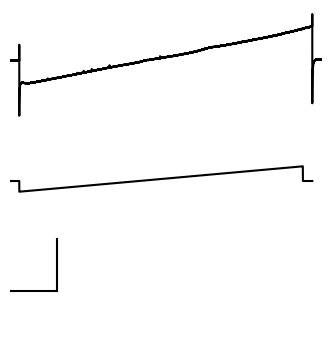

In [7]:
#%% cache 

ramp_vals = [0,-5, 0]
ramp_times = [0.02, 0.1,0.2]
freqs = {'cc' : 50000, 'vc' : 10000}

for ms in range (3000) :
    if ms == 0 or ms == 2999 : 
        print(-40+ms*95/3000 - 65 - 14.5)
    ramp_vals.append(-40+ms*95/3000)
    ramp_times.append(1/1000)

ramp_vals.append(0)
ramp_times.append(0.1)

x_prot, y_prot = protocole_values(freqs['vc'], ramp_vals, ramp_times, val_step=-65-14.5, time_delay=float(dict_user['delay_vc']['value']))

exp = exps[1]
condition = 'baseline'
p = 0 
X = results[exp][condition]['X']
Y = results[exp][condition]['Y']

try :
    l = len(X[p][0])
    X[p] = np.mean(X[p], axis = 0)
    Y[p] = np.mean(Y[p], axis = 0)
except :
    pass
f, axes = start_fig(nrows = 3, figsize=(2*cm2inch(fig_len),2*cm2inch(fig_len)), height_ratios=[4,1,4])
# infos = results[exp][condition]['infos']
axes[0].plot(X[p],Y[p], color = 'black')
axes[0] = set_ax_parameters(axes[0], just_plot=True)
plt.tight_layout()
axes[1].plot(x_prot, y_prot, color = 'black')
axes[1]= set_ax_parameters(axes[1], just_plot=True)
axes[2].plot([0.3,0.8],[0,0], color = 'black') # 1 second
axes[2].plot([0.8,0.8],[0,500], color = 'black')
axes[2] = set_ax_parameters(axes[2], just_plot=True)
axes[2].set_ylim(axes[0].get_ylim())
for ax in axes :
    ax.set_xlim([0.3,3.6])

plt.savefig('ramp_plot.png', transparent = True)
plt.show()



[0, -50, 0, -100, 0, 350, 0]


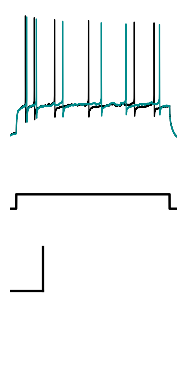

[0, -50, 0, -100, 0, 900, 0]


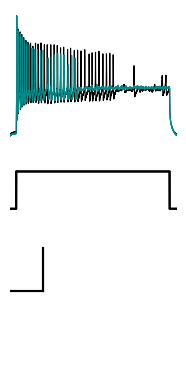

In [8]:
results = read_dict(r'W:\Analysis\patch\results.pkl')

exps = ['ramp_terb', 'ramp_terb_100', 'step'] 
colors = {'ramp_terb' : {'baseline' : 'black', 'terb' : 'cadetblue', 'inhib' : 'indianred'}, 'ramp_terb_100' : {'baseline' : 'black', 'terb' : 'darkcyan', 'inhib' : 'indianred'}, 'step' : {'baseline' : 'black', 'terb' : 'darkcyan', 'inhib' : 'indianred'}}
conditions = {'ramp_terb' : ['baseline', 'terb'], 'ramp_terb_100' : ['baseline', 'terb', 'inhib'], 'step' : ['baseline', 'terb']}
labels = {'baseline' : 'Ctrl', 'terb' : 'Terb', 'inhib' : 'PK-THPP'}
freqs = {'cc' : 50000, 'vc' : 10000}

exp = exps[2]
sweeps = [7,18]

for sweep in sweeps : 
    step_vals = [0,-50, 0, -100,0,50*sweep,0]
    print(step_vals)
    step_times = [0.05, 0.2,0.2,2,0.05,0.8,0.5]
    x_prot, y_prot = protocole_values(freqs['cc'], step_vals, step_times, time_delay=float(dict_user['delay_cc']['value']))
    f, axes = start_fig(nrows = 3, figsize=(cm2inch(fig_len),2*cm2inch(fig_len)), height_ratios=[3,1,3])
    for condition in conditions[exp] : 
        p = 0 
        X = results[exp][condition]['X']
        Y = results[exp][condition]['Y']
        X = X[p][sweep]
        Y = Y[p][sweep]
        axes[0].plot(X, Y, color = colors[exp][condition], lw = 0.8)
        axes[0] = set_ax_parameters(axes[0], just_plot=True)
        plt.tight_layout()
        axes[1].plot(x_prot, y_prot, color = 'black')
        axes[1]= set_ax_parameters(axes[1], just_plot=True)
        axes[1].set_ylim([-150,1000])
        axes[2].plot([2.5,2.7],[0,0], color = 'black') # 1 second
        axes[2].plot([2.7,2.7],[0,50], color = 'black')
        axes[2] = set_ax_parameters(axes[2], just_plot=True)
        axes[2].set_ylim(axes[0].get_ylim())
        for ax in axes :
            ax.set_xlim([2.53,3.4])
    
    plt.savefig(f'step_plot_{sweep}.png', transparent = True)
    plt.show()


[0, -50, 0, -100, 0, 900, 0]


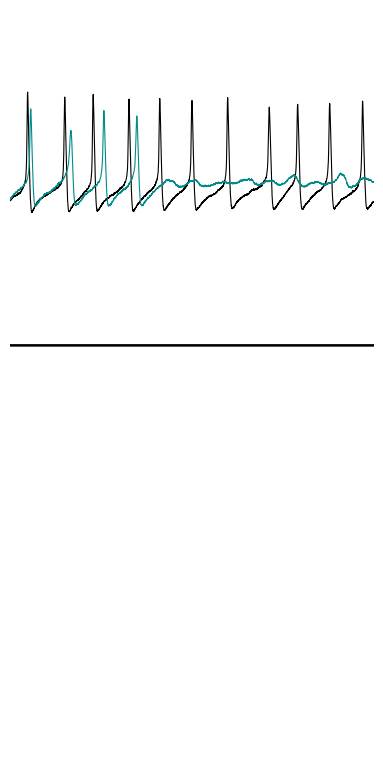

In [9]:
exp = exps[2]
sweeps = [18]

for sweep in sweeps : 
    step_vals = [0,-50, 0, -100,0,50*sweep,0]
    print(step_vals)
    step_times = [0.05, 0.2,0.2,2,0.05,0.8,0.5]
    x_prot, y_prot = protocole_values(freqs['cc'], step_vals, step_times, time_delay=float(dict_user['delay_cc']['value']))
    f, axes = start_fig(nrows = 3, figsize=(2*cm2inch(fig_len),4*cm2inch(fig_len)), height_ratios=[3,1,3])
    for condition in conditions[exp] : 
        p = 0 
        X = results[exp][condition]['X']
        Y = results[exp][condition]['Y']
        X = X[p][sweep]
        Y = Y[p][sweep]
        axes[0].plot(X, Y, color = colors[exp][condition], lw = 0.8)
        axes[0] = set_ax_parameters(axes[0], just_plot=True)
        plt.tight_layout()
        axes[1].plot(x_prot, y_prot, color = 'black')
        axes[1]= set_ax_parameters(axes[1], just_plot=True)
        axes[1].set_ylim([-150,1000])
        axes[2].plot([2.5,2.7],[0,0], color = 'black') # 1 second
        axes[2].plot([2.7,2.7],[0,50], color = 'black')
        axes[2] = set_ax_parameters(axes[2], just_plot=True)
        axes[2].set_ylim(axes[0].get_ylim())
        for ax in axes :
            ax.set_xlim([2.8,3])
    
    plt.savefig(f'step_plot_{sweep}.png', transparent = True)
    plt.show()

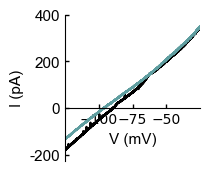

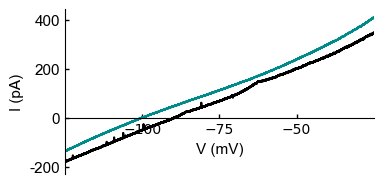

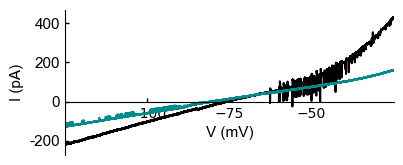

-35.50350011667055


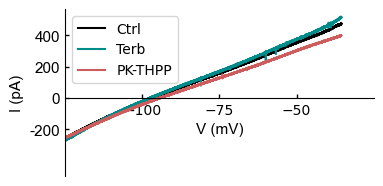

0 1 0.591910156372494 ttest
Median : -89.3305. Std : 8.723564551085634, Mean: -87.18008655822582, SEM: 6.168491650191232
Median : -97.25255841861394. Std : 8.879317633497138, Mean: -92.3010230174339, SEM: 6.278625710955114


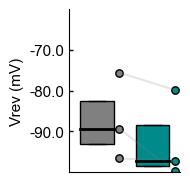

[-89.3305, -97.25255841861394]
0 1 0.6668901317854181 ttest
Median : 0.4984495937824249. Std : 0.35865816473960876, Mean: 0.6738350987434387, SEM: 0.2536096184942424
Median : 0.3331337869167328. Std : 0.3187869191169739, Mean: 0.516455352306366, SEM: 0.2254163817267014


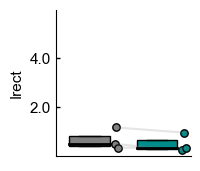

0 1 0.9275472765227535 ttest
Median : 5.118219444035907. Std : 2.2105609619579623, Mean: 6.492108286176148, SEM: 1.563102646426733
Median : 5.543863498927476. Std : 3.092844614056533, Mean: 6.231916934236622, SEM: 2.1869713997556652
[5.118219444035907, 5.543863498927476]
0 1 0.47449827502680914 ttest
Median : 8.932221656056381. Std : 2.641289478269873, Mean: 8.831128010046118, SEM: 1.8676737011613056
Median : 6.379100989008141. Std : 3.0118835695781696, Mean: 6.5975281533361825, SEM: 2.1297232961930685
[8.932221656056381, 6.379100989008141]
0 1 1.0 wilcoxon
Median : 1.0837480586376271. Std : 0.7213139139368356, Mean: 1.5146587113094718, SEM: 0.5100459599089463
Median : 1.0661857086794801. Std : 0.0588868164898447, Mean: 1.0746711395825883, SEM: 0.041639267262456994
[1.0837480586376271, 1.0661857086794801]


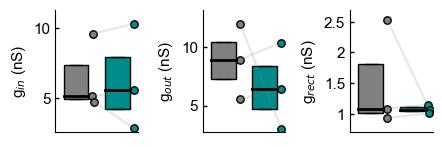

0 1 0.5336873848070727 ttest
Median : 198.47037654890312. Std : 39.13550958217993, Mean: 171.0963361142332, SEM: 27.67298421075054
Median : 206.55549579417698. Std : 95.11162800598633, Mean: 220.5666421632936, SEM: 67.25407713272529


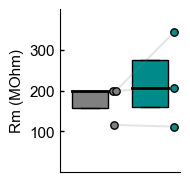

[198.47037654890312, 206.55549579417698]
baseline 350 7.500187504687616
baseline 900 50.00125003125077
51.25128128203204
55.00137503437585 850.0
terb 350 7.500187504687616
terb 900 37.50093752343808
38.75096877421935
50.00125003125077 750.0


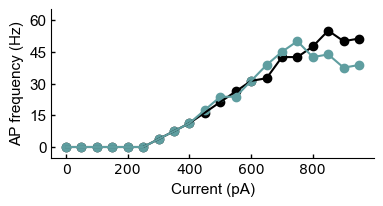

Median : -72.99777221679688. Std : 0.0, Mean: -72.99777221679688, SEM: nan
Median : -72.30552673339844. Std : 0.0, Mean: -72.30552673339844, SEM: nan


c:\Users\melina.scopin\.conda\envs\mne\Lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\melina.scopin\.conda\envs\mne\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


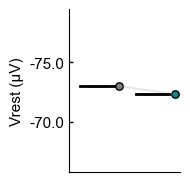

[-72.99777, -72.30553]


In [17]:
results = read_dict(r'W:\Analysis\patch\results.pkl')

exps = ['ramp_terb', 'ramp_terb_100', 'step'] 
colors = {'ramp_terb' : {'baseline' : 'black', 'terb' : 'cadetblue', 'inhib' : 'indianred'}, 'ramp_terb_100' : {'baseline' : 'black', 'terb' : 'darkcyan', 'inhib' : 'indianred'}}
conditions = {'ramp_terb' : ['baseline', 'terb'], 'ramp_terb_100' : ['baseline', 'terb', 'inhib'], 'step' : ['baseline', 'terb']}
labels = {'baseline' : 'Ctrl', 'terb' : 'Terb', 'inhib' : 'PK-THPP'}


exp = exps[0]
f, ax = start_fig()
for condition in conditions[exp] : 
    infos = results[exp][condition]['infos']
    for i in range (len(infos)) : 
        ax.plot(infos[i]['voltage'], infos[i]['current'], color = colors[exp][condition])
        ax.set_xlim([-125,-25])
        ax = set_ax_parameters(ax, show_xticks= True, xticks = [-100,-75,-50], yticks=[-200,0,200,400], ylabel = 'I (pA)', xlabel='V (mV)')
        ax.spines['bottom'].set_position(('data',0))
plt.show()

exp = exps[1]
Vrev = {condition : [] for condition in conditions[exp][:2]}
g1 = {condition : [] for condition in conditions[exp][:2]}
g2 = {condition : [] for condition in conditions[exp][:2]}
Irect = {condition : [] for condition in conditions[exp][:2]}
Rm = {condition : [] for condition in conditions[exp][:2]}

for i in range (3) : 
    f, ax = start_fig(figsize=(2*cm2inch(fig_len),cm2inch(fig_len)))
    for condition in conditions[exp][:2] : 
        infos = results[exp][condition]['infos']
        ax.plot(infos[i]['voltage'], infos[i]['current'], color = colors[exp][condition], label = labels[condition])
        ax.set_xlim([-125,-25])
        ax = set_ax_parameters(ax, show_xticks= True, xticks = [-100,-75,-50], yticks=[-200,0,200,400], ylabel = 'I (pA)', xlabel='V (mV)')
        ax.spines['bottom'].set_position(('data',0))
        Vrev[condition].append(infos[i]["Vrev"])
        g1[condition].append(infos[i]["g_1"])
        g2[condition].append(infos[i]["g_2"])
        Irect[condition].append(infos[i]["I_rect"])
        Rm[condition].append(results[exp][condition]['membrane'][i]["Rm"]*1e-6)
   
   
    if i == 2 :
        condition = conditions[exp][2]
        infos = results[exp][condition]['infos']
        ax.plot(infos[0]['voltage'], infos[0]['current'], color = colors[exp][condition], label = labels[condition])
        print(infos[0]['voltage'][-1])
        ax.set_xlim([-125,-25])
        ax = set_ax_parameters(ax, show_xticks= True, xticks = [-100,-75,-50], yticks=[-200,0,200,400],  ylabel = 'I (pA)', xlabel='V (mV)')
        plt.tight_layout()
        plt.legend()
        plt.savefig('inhib.png', transparent = True)
        
    if i == 0 :
        plt.tight_layout()
        plt.savefig('ramp.png')
        
    plt.show()

colors = {'baseline' : 'grey', 'terbinafine' : 'cadetblue', 'NPBA_10' : 'goldenrod', 'NPBA_20' : 'goldenrod','washout' : 'grey', 'terbinafine_100' : 'darkcyan'}
Vrevs = [Vrev[key] for key in Vrev.keys()]
make_boxplot(Vrevs, ['baseline', 'terbinafine_100'], limy = [-100,-60], ylabel='Vrev (mV)', draw_line=True, saving = True, namefig='Vrev')
print([np.nanmedian(Vrev) for Vrev in Vrevs])

Irects = [Irect[key] for key in Irect.keys()]
make_boxplot(Irects, ['baseline', 'terbinafine_100'], limy = [0,6], ylabel='Irect', draw_line=True)

f, axes = start_fig(ncols = 3, figsize=(2.3*cm2inch(fig_len),0.8*cm2inch(fig_len)))

g1s = [g1[key] for key in g1.keys()]
axes[0] = make_boxplot(g1s, ['baseline', 'terbinafine_100'], limy = None, ylabel=r'g$_{in}$ (nS)', draw_line=True, fig=f, ax = axes[0], show = False, yticks = [5,10])
print([np.nanmedian(g1) for g1 in g1s])

g2s = [g2[key] for key in g2.keys()]
axes[1] = make_boxplot(g2s, ['baseline', 'terbinafine_100'], limy = None, ylabel=r'g$_{out}$ (nS)', draw_line=True, fig=f, ax = axes[1], show = False, yticks = [5,10])
print([np.nanmedian(g2) for g2 in g2s])

for i in range (len(g1s)) :
    for j in range (len(g1s[i])) :
        g1s[i][j] = g2s[i][j]/g1s[i][j]
axes[2] = make_boxplot(g1s, ['baseline', 'terbinafine_100'], limy = [0.7,2.7], ylabel=r'g$_{rect}$ (nS)', draw_line=True,  yticks = [1,1.5,2,2.5], fig=f, ax = axes[2], show = False)
print([np.nanmedian(g1) for g1 in g1s])
plt.tight_layout()
plt.savefig('conductances.png', transparent = True)
plt.show()


Rms = [Rm[key] for key in Rm.keys()]
make_boxplot(Rms, ['baseline', 'terbinafine_100'], ylabel='Rm (MOhm)', draw_line=True, saving = True, namefig='Rm', yticks=[100,200,300], limy = [0,400])
print([np.nanmedian(Rm) for Rm in Rms])

exp = exps[2]
colors = {'step' : {'baseline' : 'black', 'terb' : 'cadetblue', 'inhib' : 'indianred'}, 'ramp_terb_100' : {'baseline' : 'black', 'terb' : 'darkcyan', 'inhib' : 'indianred'}}
Vrest = {condition : [] for condition in conditions[exp][:2]}
f, ax = start_fig(figsize=(2*cm2inch(fig_len),1.1*cm2inch(fig_len)))
for condition in conditions[exp] : 
    infos = results[exp][condition]['infos']
    infos_mb = results[exp][condition]['membrane']
    for i in range (len(infos)) :
        Vrest[condition].append(infos_mb[i]["Vrest"])
        x = infos[i]['current']
        y = infos[i]['frequency']
        for val in [350,900] : 
            print(condition, val, y[x.index(val)])
        print(y[-1])
        print(max(y),x[np.argmax(y)])
        ax.plot(x,y, color = colors[exp][condition])
        ax.scatter(x,y, color = colors[exp][condition])
        ax.set_ylim([-5,65])
        #ax.set_xlim([-10,800])
        ax = set_ax_parameters(ax, show_xticks=True, ylabel = 'AP frequency (Hz)', xlabel = 'Current (pA)', xticks = [0,200,400,600, 800], yticks = [0,15,30, 45,60])
plt.tight_layout()
plt.savefig('frequency.png', transparent = True)
plt.show()

Vrests = [Vrest[key] for key in Vrest.keys()]
make_boxplot(Vrests, ['baseline', 'terbinafine_100'], limy = None, ylabel='Vrest (µV)', draw_line=True, saving = True, namefig='Vrest')
print([np.nanmedian(vrest) for vrest in Vrests])

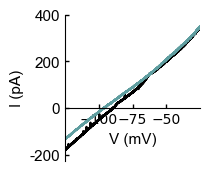

In [11]:
results = read_dict(r'W:\Analysis\patch\results.pkl')

exps = ['ramp_terb', 'ramp_terb_100', 'step'] 
colors = {'ramp_terb' : {'baseline' : 'black', 'terb' : 'cadetblue', 'inhib' : 'indianred'}, 'ramp_terb_100' : {'baseline' : 'black', 'terb' : 'darkcyan', 'inhib' : 'indianred'}}
conditions = {'ramp_terb' : ['baseline', 'terb'], 'ramp_terb_100' : ['baseline', 'terb', 'inhib'], 'step' : ['baseline', 'terb']}

exp = exps[0]
f, ax = start_fig()
for condition in conditions[exp] : 
    infos = results[exp][condition]['infos']
    for i in range (len(infos)) : 
        ax.plot(infos[i]['voltage'], infos[i]['current'], color = colors[exp][condition])
        ax.set_xlim([-125,-25])
        ax = set_ax_parameters(ax, show_xticks= True, xticks = [-100,-75,-50], yticks=[-200,0,200,400], ylabel = 'I (pA)', xlabel='V (mV)')
        ax.spines['bottom'].set_position(('data',0))
plt.show()

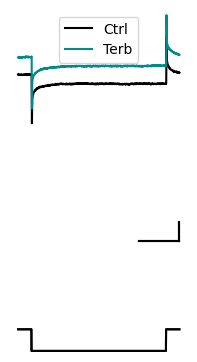

In [12]:
data_info = read_dict(r'W:\Analysis\patch\infos.pkl')
exp =  'ramp_terb_100' 
window = 0.01
colors = {'ramp_terb' : {'baseline' : 'black', 'terb' : 'cadetblue', 'inhib' : 'indianred'}, 'ramp_terb_100' : {'baseline' : 'black', 'terb' : 'darkcyan', 'inhib' : 'indianred'}}


f, axes = start_fig(nrows = 3, height_ratios=[5,5,1], figsize=(1.3*cm2inch(fig_len),2*cm2inch(fig_len)))

for c,condition in enumerate(conditions[exp][:2]) : 
    paths, sweeps = data_info[exp][condition]
    X, Y, infos = read_abf_file(paths[0], funct_sweeps=sweeps[paths[0]], ask_user=False, membrane = True)
    infos = membrane_properties(X, Y, infos, show_ref_resist=False)
    step_time = [infos[f'step_start_{infos["mode"]}'] + infos[f'delay_{infos["mode"]}'],infos[f'step_stop_{infos["mode"]}'] + infos[f'delay_{infos["mode"]}']]
    X = np.mean(X, axis = 0)
    Y = np.mean(Y, axis = 0)
    data = [Y[i] for i in range (len(Y)) if X[i] >= step_time[0]-window and X[i] <= step_time[1]+window]
    time = [X[i] for i in range (len(X)) if X[i] >= step_time[0]-window and X[i] <= step_time[1]+window]
    protocole = [-1 for i in range (len(X)) if X[i] >= step_time[0]-window and X[i] <= step_time[1]+window]
    for i in range(len(protocole)) : 
        if time[i] <= step_time[0] or time[i] >= step_time[1] : 
            protocole[i] = 0
    if condition == 'baseline' : 
        label = 'Ctrl'
    else : 
        label = 'Terb'
    axes[0].plot(time,data, color = colors[exp][condition], label = label)
    axes[0] = set_ax_parameters(axes[0], just_plot=True)
    axes[1].plot([time[-1]-3*window,time[-1]], [0,0], color = 'black')
    axes[1].set_xlim(axes[0].get_xlim())
    axes[1].plot([time[-1],time[-1]], [0,50], color = 'black')
    axes[1].set_ylim(axes[0].get_ylim())
    axes[1] = set_ax_parameters(axes[1], just_plot=True)
    axes[2].plot(time, protocole, color = 'black')
    axes[2] = set_ax_parameters(axes[2], just_plot=True)

axes[0].legend()
plt.savefig('step.png', transparent = True)
plt.show()